In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

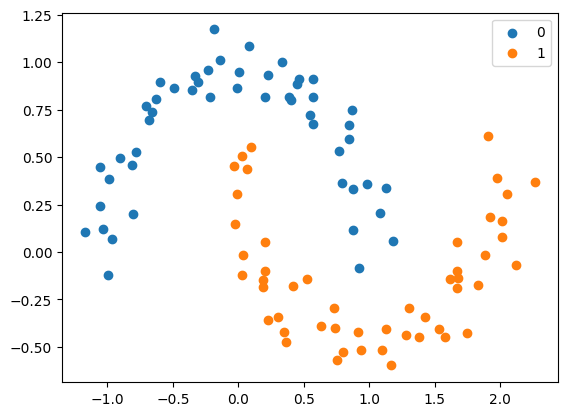

In [2]:
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

plt.scatter(X[np.where((y==0)),0],X[np.where((y==0)),1], label='0')
plt.scatter(X[np.where((y==1)),0],X[np.where((y==1)),1], label='1')
plt.legend()
plt.show()

In [3]:
def build_model2(activation = 'sigmoid', loss='binary_crossentropy'): #Primer intento de red neuronal, con ReLU el cual funciona muy bien, y para la capa final sigmoide ya que es perfecta para un problema binario como este
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(4, input_dim=2, activation='relu'))
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(1, activation = activation))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

In [4]:
train_X, test_X = X[:80, :], X[20:, :] #Utilizamos 80% para entrenar la red, y 20% para probarlo
train_y, test_y = y[:80], y[20:]
model = build_model2()
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=500, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.5648 - loss: 0.6944 - val_accuracy: 0.6125 - val_loss: 0.6899
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5727 - loss: 0.6904 - val_accuracy: 0.6125 - val_loss: 0.6886
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5984 - loss: 0.6894 - val_accuracy: 0.6000 - val_loss: 0.6875
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5602 - loss: 0.6867 - val_accuracy: 0.6000 - val_loss: 0.6864
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5320 - loss: 0.6874 - val_accuracy: 0.5875 - val_loss: 0.6853
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5562 - loss: 0.6835 - val_accuracy: 0.5750 - val_loss: 0.6841
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5383 - loss: 0.6833 - val_accuracy: 0.5625 - val_loss: 0.6830
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5188 - loss: 0.6851 - val_accuracy: 0.5750 - val_loss

In [5]:
_, train_acc = model.evaluate(train_X, train_y, verbose=0)
_, test_acc = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.875, Test: 0.863


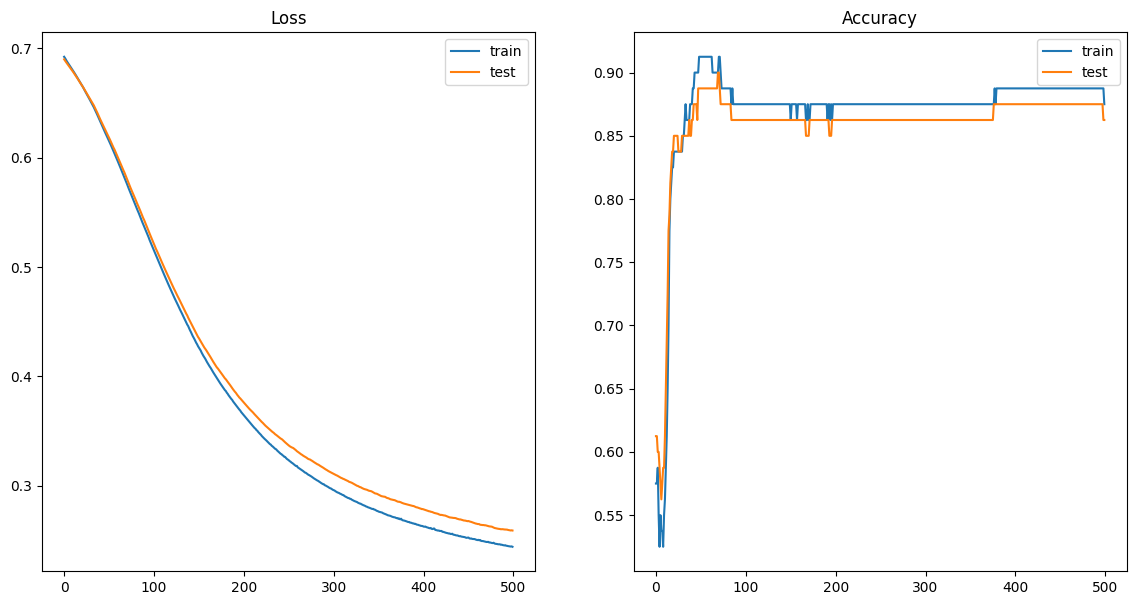

In [6]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Vemos que con 500 repeticiones la red neuronal no aprende lo suficiente, ademas, la perdida no es satisfactoria, veamos si agregando mas repeticiones aumenta, o si debemos hacer algun cambio en la red

In [20]:
X, y = make_moons(n_samples=500, noise=0.1, random_state=42) #Aumentamos la cantidad de datos

In [29]:
def build_model2(activation = 'sigmoid', loss='binary_crossentropy'): #Segundointento de red neuronal, agregamos otra capa, con ReLU el cual funciona muy bien, y para la capa final sigmoide ya que es perfecta para un problema binario como este
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(2, input_dim=2, activation='relu'))
  model.add(keras.layers.Dense(16, activation='relu'))
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(1, activation = activation))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

In [30]:
train_X, test_X = X[:400, :], X[100:, :]
train_y, test_y = y[:400], y[100:]
model = build_model2()
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=400, verbose=1)

Epoch 1/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3971 - loss: 0.7438 - val_accuracy: 0.5425 - val_loss: 0.7270
Epoch 2/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5666 - loss: 0.7259 - val_accuracy: 0.5650 - val_loss: 0.7207
Epoch 3/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4880 - loss: 0.7203 - val_accuracy: 0.5950 - val_loss: 0.7161
Epoch 4/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5554 - loss: 0.7180 - val_accuracy: 0.6200 - val_loss: 0.7127
Epoch 5/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5520 - loss: 0.7162 - val_accuracy: 0.6500 - val_loss: 0.7104
Epoch 6/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5825 - loss: 0.7121 - val_accuracy: 0.6500 - val_loss: 0.7085
Epoch 7/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6030 - loss: 0.7132 - val_accuracy: 0.6475 - val_loss: 0.7067
Epoch 8/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6450 - loss: 0.7067 - val_accuracy: 0.6500 - 

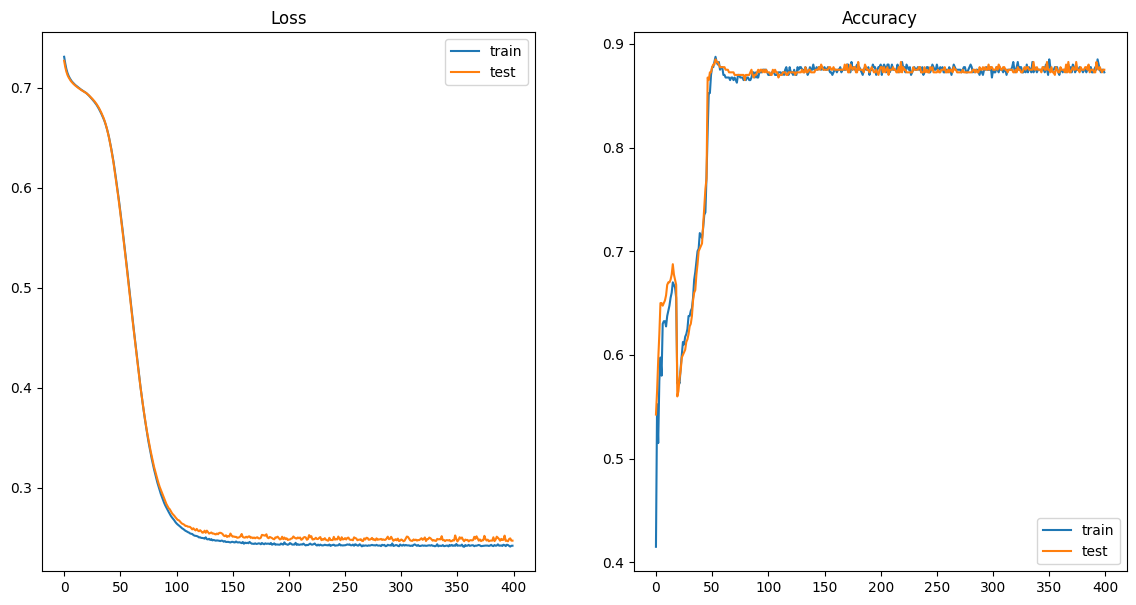

In [31]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Vemos que mejora, ademas las dos graficas, tanto train como test son casi iguales

2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

In [112]:
keras.backend.clear_session()

In [113]:
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape

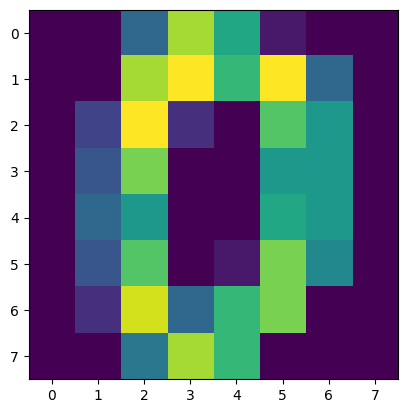

In [96]:
plt.imshow(X[0].reshape(8, 8))

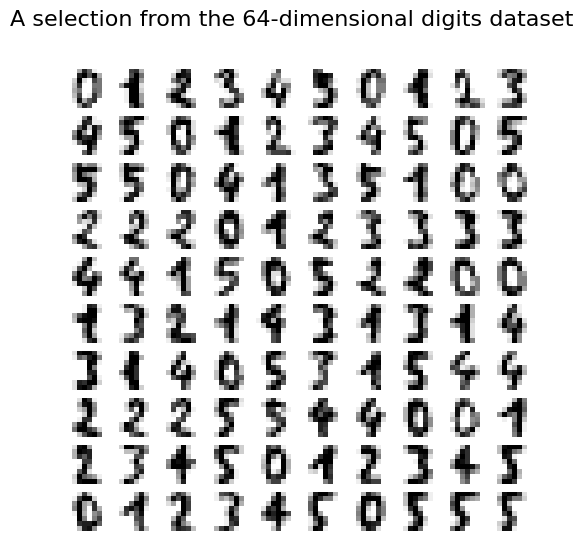

In [114]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 6)
y_test = to_categorical(y_test, 6)

X_train = X_train / 16.0
X_test = X_test / 16.0

In [116]:
def build_model2(activation = 'softmax', loss='categorical_crossentropy'):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(128, input_dim=64, activation='relu'))
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(6, activation = activation))
  model.compile(loss=loss, optimizer="adam", metrics=['accuracy'])
  return model

In [117]:
model = build_model2()
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5104 - loss: 1.5435 - val_accuracy: 0.9124 - val_loss: 0.8510
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9443 - loss: 0.6896 - val_accuracy: 0.9585 - val_loss: 0.2977
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9724 - loss: 0.2440 - val_accuracy: 0.9724 - val_loss: 0.1525
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9724 - loss: 0.1564 - val_accuracy: 0.9908 - val_loss: 0.0946
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9903 - loss: 0.0880 - val_accuracy: 0.9908 - val_loss: 0.0753
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9867 - loss: 0.0755 - val_accuracy: 0.9908 - val_loss: 0.0584
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9865 - loss: 0.0671 - val_accuracy: 0.9954 - val_loss: 0.0497
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9933 - loss: 0.0490 - val_accuracy: 0.9954 - val_loss: